In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Import Data


In [173]:
df = pd.read_csv("heart_attack_prediction_dataset.csv")

In [174]:
df.keys()

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [175]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


# EDA

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [177]:
df.drop(['Patient ID', 'Blood Pressure', 'Diet', 'Country', 'Continent', 'Hemisphere'], axis = 1, inplace = True)

In [178]:
df.isna().any()

Age                                False
Sex                                False
Cholesterol                        False
Heart Rate                         False
Diabetes                           False
Family History                     False
Smoking                            False
Obesity                            False
Alcohol Consumption                False
Exercise Hours Per Week            False
Previous Heart Problems            False
Medication Use                     False
Stress Level                       False
Sedentary Hours Per Day            False
Income                             False
BMI                                False
Triglycerides                      False
Physical Activity Days Per Week    False
Sleep Hours Per Day                False
Heart Attack Risk                  False
dtype: bool

In [179]:
df.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,67,Male,208,72,0,0,1,0,0,4.168189,0,0,9,6.615001,261404,31.251233,286,0,6,0
1,21,Male,389,98,1,1,1,1,1,1.813242,1,0,1,4.963459,285768,27.194973,235,1,7,0
2,21,Female,324,72,1,0,0,0,0,2.078353,1,1,9,9.463426,235282,28.176571,587,4,4,0
3,84,Male,383,73,1,1,1,0,1,9.828130,1,0,9,7.648981,125640,36.464704,378,3,4,0
4,66,Male,318,93,1,1,1,1,0,5.804299,1,0,6,1.514821,160555,21.809144,231,1,5,0


In [180]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   int32  
 2   Cholesterol                      8763 non-null   int64  
 3   Heart Rate                       8763 non-null   int64  
 4   Diabetes                         8763 non-null   int64  
 5   Family History                   8763 non-null   int64  
 6   Smoking                          8763 non-null   int64  
 7   Obesity                          8763 non-null   int64  
 8   Alcohol Consumption              8763 non-null   int64  
 9   Exercise Hours Per Week          8763 non-null   float64
 10  Previous Heart Problems          8763 non-null   int64  
 11  Medication Use                   8763 non-null   int64  
 12  Stress Level        

In [182]:
df['Heart Attack Risk'].value_counts()

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64

C:\Users\Admin\anaconda3\envs\MachinLearning1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\envs\MachinLearning1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\envs\MachinLearning1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


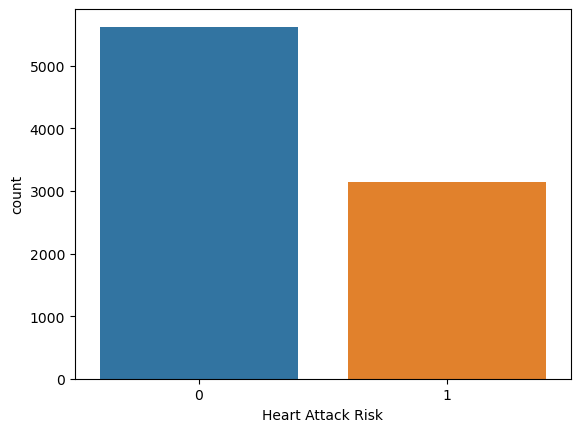

In [183]:
sns.countplot(data=df, x='Heart Attack Risk');

In [184]:
df.corr()['Heart Attack Risk'].sort_values(ascending=False)

Heart Attack Risk                  1.000000
Cholesterol                        0.019340
Diabetes                           0.017225
Exercise Hours Per Week            0.011133
Triglycerides                      0.010471
Income                             0.009628
Age                                0.006403
Sex                                0.003095
Medication Use                     0.002234
Previous Heart Problems            0.000274
BMI                                0.000020
Family History                    -0.001652
Smoking                           -0.004051
Stress Level                      -0.004111
Heart Rate                        -0.004251
Physical Activity Days Per Week   -0.005014
Sedentary Hours Per Day           -0.005613
Obesity                           -0.013318
Alcohol Consumption               -0.013778
Sleep Hours Per Day               -0.018528
Name: Heart Attack Risk, dtype: float64

In [185]:
df.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,67,1,208,72,0,0,1,0,0,4.168189,0,0,9,6.615001,261404,31.251233,286,0,6,0
1,21,1,389,98,1,1,1,1,1,1.813242,1,0,1,4.963459,285768,27.194973,235,1,7,0
2,21,0,324,72,1,0,0,0,0,2.078353,1,1,9,9.463426,235282,28.176571,587,4,4,0
3,84,1,383,73,1,1,1,0,1,9.828130,1,0,9,7.648981,125640,36.464704,378,3,4,0
4,66,1,318,93,1,1,1,1,0,5.804299,1,0,6,1.514821,160555,21.809144,231,1,5,0


# Train Test Split

In [186]:
X = df.iloc[:,0:19]
y = df.iloc[:,19]

In [187]:
X

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day
0,67,1,208,72,0,0,1,0,0,4.168189,0,0,9,6.615001,261404,31.251233,286,0,6
1,21,1,389,98,1,1,1,1,1,1.813242,1,0,1,4.963459,285768,27.194973,235,1,7
2,21,0,324,72,1,0,0,0,0,2.078353,1,1,9,9.463426,235282,28.176571,587,4,4
3,84,1,383,73,1,1,1,0,1,9.828130,1,0,9,7.648981,125640,36.464704,378,3,4
4,66,1,318,93,1,1,1,1,0,5.804299,1,0,6,1.514821,160555,21.809144,231,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,1,121,61,1,1,1,0,1,7.917342,1,1,8,10.806373,235420,19.655895,67,7,7
8759,28,0,120,73,1,0,0,1,0,16.558426,0,0,8,3.833038,217881,23.993866,617,4,9
8760,47,1,250,105,0,1,1,1,1,3.148438,1,0,5,2.375214,36998,35.406146,527,4,4
8761,36,1,178,60,1,0,1,0,0,3.789950,1,1,5,0.029104,209943,27.294020,114,2,8


In [160]:
y

0       0
1       0
2       0
3       0
4       0
       ..
8758    0
8759    0
8760    1
8761    0
8762    1
Name: Heart Attack Risk, Length: 8763, dtype: int64

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=42)

In [190]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [192]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [ ]:
svm = SVC()
param_grid = {
    'C': [0.1, 1, 10],
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree' : [2, 3, 4],
}

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)